In [ ]:
# Q 과제 
# Q. Start칼럼의 분포 및 이상치 여부를 탐색하는 Box plot 및 이상치를 구하세요

In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:

df['NDate']=pd.to_datetime(df.Date)

df1= df.set_index('NDate')

df1.drop(['Date','Volume'],axis=1,inplace=True)

df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:>

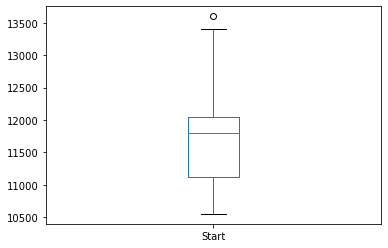

In [5]:
df.Start.plot(kind='box')

In [6]:
df.describe()

,Close,Start,High,Low,Volume
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,11662.500000,11755.000000,12015.000000,11374.500000,158014.150000
std,927.060294,865.250192,907.729962,884.369981,134473.512003
min,10100.000000,10550.000000,10900.000000,9990.000000,25171.000000
25%,11087.500000,11125.000000,11350.000000,10737.500000,58323.250000
50%,11725.000000,11800.000000,12025.000000,11500.000000,134176.500000
75%,11962.500000,12050.000000,12262.500000,11912.500000,185836.000000
max,13450.000000,13600.000000,13700.000000,13150.000000,558148.000000


In [9]:
Q1= df.Start.describe()['25%']
Q2= df.Start.describe()['75%']
iqr= Q2-Q1

for i in df.Start:
    if not Q1-iqr*1.5<= i <= Q2+iqr*1.5:
        print(i)


13600


In [15]:
Q1= df.Start.describe()['25%']
Q2= df.Start.describe()['75%']
iqr= Q2-Q1

upper= Q2 + iqr*1.5
print(upper)
print()

ch= df.Start.sort_values(ascending=False)
print(ch[:5])
print()

df.Start[df.Start>=upper]



13437.5

11    13600
10    13400
12    13200
16    12200
13    12200
Name: Start, dtype: int64



11    13600
Name: Start, dtype: int64

In [88]:
# Q. df_auto의 각 컬럼을 시각화해서 탐색한 후 인사이트를 기술하세요
# 5개 이상
import pandas as pd
df_auto= pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [89]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<AxesSubplot:ylabel='Frequency'>

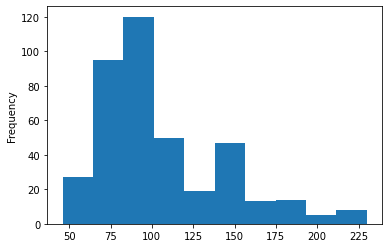

In [90]:
df_auto.horsepower.unique()
df_auto.horsepower.value_counts()['?']
# df_auto.horsepower.replace('?',df_auto.horsepower.mean(),inplace=True)

df_auto.horsepower.replace('?',0,inplace=True)
df_auto.horsepower.fillna(df_auto.horsepower.mean(),inplace=True)

# df_auto.horsepower.plot(kind='bar')
df_auto.horsepower.plot(kind='hist', bins=10)

In [ ]:
# horsepower은 대충 70~120정도 구간에 몰려있다. 
# 가장 분포가 높은 구간은 75~100구간

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

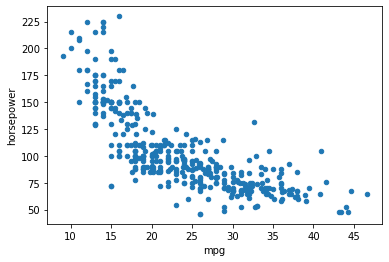

In [68]:

df_auto.plot(x='mpg',y='horsepower',kind='scatter')

In [ ]:
# mpg가 커질수록 horsepower은 줄어드는 양상을 보인다. 

In [57]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


<AxesSubplot:>

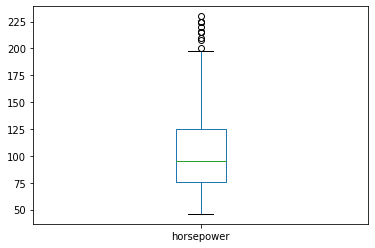

In [58]:
df_auto.horsepower.plot(kind='box')

# 이상치가 꽤 많네요 

In [61]:
df_auto.horsepower.describe()


count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [65]:
# 이상치 구하기 
Q1= df_auto.horsepower.describe()['25%']
Q2= df_auto.horsepower.describe()['75%']
iqr= Q2-Q1

upper= Q2 + iqr*1.5
print(upper)
print()

# 내림차순으로 뽑기 (이상치가 윗쪽에 있으니까)
ch= df_auto.horsepower.sort_values(ascending=False)
print(ch[:20])
print()

outlier_count= df_auto.horsepower[df_auto.horsepower>=upper]
outlier_count

198.5

116    230.0
8      225.0
95     225.0
13     225.0
6      220.0
25     215.0
7      215.0
94     215.0
27     210.0
67     208.0
26     200.0
5      198.0
90     198.0
28     193.0
231    190.0
9      190.0
70     190.0
229    180.0
124    180.0
212    180.0
Name: horsepower, dtype: float64



6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
26     200.0
27     210.0
67     208.0
94     215.0
95     225.0
116    230.0
Name: horsepower, dtype: float64

In [67]:
# 이상치 개수
outlier_count.count()

11

In [ ]:
# mpg: 연비 
# cylinders: 실린더 갯수
# displacement: 이동 거리
# horsepower: 마력
# weight: 무게
# acceleration: 가속
# model year: 출시년도
# origin: 출시국가


In [30]:
# 남북한 발전량 데이터를 시각적으로 탐색하고
# 그 특징을 요약기술하기
df_ep = pd.read_excel('dataset/df_ep.xlsx')
df_ep.head()


,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


<AxesSubplot:xlabel='year'>

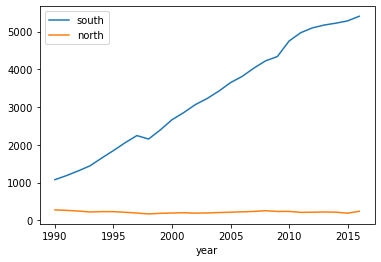

In [31]:
df_ep.set_index('year',inplace=True)
df_ep.plot()

In [33]:
df_ep.head()

,south,north
year,,
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


In [34]:
df_ep.describe()

,south,north
count,27.000000,27.000000
mean,3278.629630,219.037037
std,1435.906927,25.236545
min,1077.000000,170.000000
25%,2104.000000,199.000000
50%,3225.000000,216.000000
75%,4541.500000,235.500000
max,5404.000000,277.000000


<AxesSubplot:xlabel='year'>

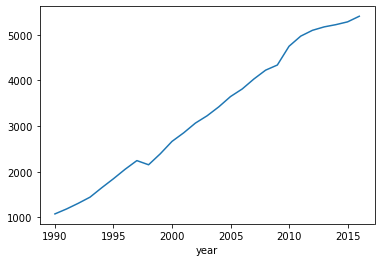

In [36]:
df_ep.south.plot()

# 남한은 최고 5000에 꾸준한 상승세 

<AxesSubplot:xlabel='year'>

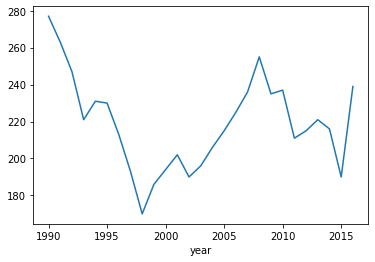

In [37]:
df_ep.north.plot()
# 북한은 발전량이 280 이하에서 등락함. 상승세라고 보기 어려움 

In [ ]:
# Q. mpg컬럼의 이상치를 구하세요

In [ ]:
# 통계학의 기초 개념을 설명하세요

1. 모수의 개념 및 사례
2. 통계량의 개념 및 사례
3. 확률변수, 확률, 확률분호
4. 도수, 도수분포, 상대도수
5. 평균값, 기대값, 분산, 표준편차
6. 확률질량함수, 확률밀도함수 
7. 정규분포, 이항분포, 포아송분포
8. 표본분산(n), 불편분산(n-1)(왜 불편분산써야하는지)
9. 기술통계, 추측통계
10. 가설과 검정 

### 1: 모수의 개념 및 사례

모수는 모집단의 특성을 나타내는 값
모집단 분포의 특성을 규정짓는 척도이다. 
(모평균/ 모분산/ 모비율/ 모 표준편차 등)


### 2. 통계량의 개념 및 사례

